In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Kaggle Dataset
data = pd.read_csv("all_stocks_5yr.csv", parse_dates = True , index_col='date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 975 entries, 2014-03-27 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    975 non-null    float64
 1   high    975 non-null    float64
 2   low     975 non-null    float64
 3   close   975 non-null    float64
 4   volume  975 non-null    int64  
 5   Name    975 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 53.3+ KB


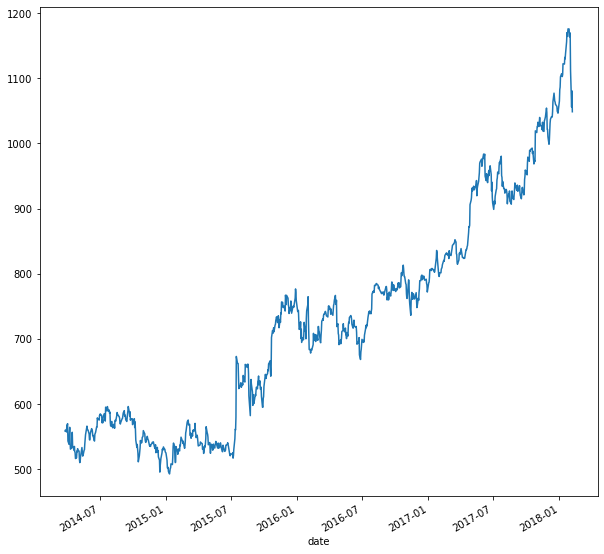

In [3]:
#Esercizio: Verificare stock split in google. Non c'è
goog = data[data['Name'] == "GOOG"]
goog.info()
goog['close'].plot(figsize = (10,10))

In [4]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


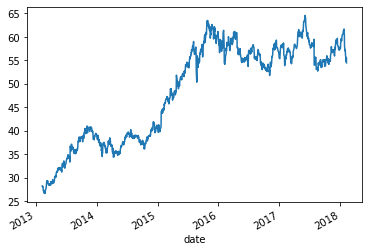

In [5]:
sbux['close'].plot()

In [6]:
#Per calcolare il return, abbiamo bisogno sia del close price corrente che
#quello precedente. Per ottenerlo usiamo:

sbux['prev_close'] = sbux['close'].shift(1)

#La funzione shift sposta di n posti in basso. Per questo, il primo sarà
#un Nan

In [7]:
sbux.head()
#Perchè facciamo lo shift dall'alto e non dal basso?
#In realtà non cambia un cazzo. Semplicemente dopo lo si chiama "next_close"

,open,high,low,close,volume,Name,prev_close
date,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [8]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [9]:
sbux.head()
#Notiamo che i return son molto piccoli. Motivo per il quale in genere
#Si lavora con i basis points.

,open,high,low,close,volume,Name,prev_close,return
date,,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [10]:
#Un altro modo è usare la percent change function:
#L'argomento è il numero di time steps su cui basiamo il change
sbux['return_pct_change'] = sbux['close'].pct_change(1)

In [11]:
sbux.head()

,open,high,low,close,volume,Name,prev_close,return,return_pct_change
date,,,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


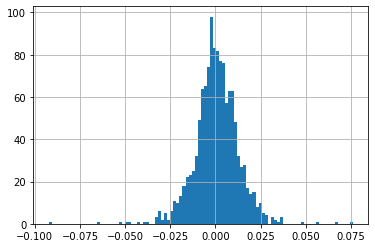

In [12]:
'''
Per ora abbiamo sempre plottato time series. Ora vorremmo capire
come sono distribuiti i return. usiamo un istogramma.
La curva è una tipica a campana. Vedremo cosa significa questo più in là
'''
sbux['return'].hist(bins=100)


In [13]:
sbux['return'].mean(), sbux['return'].std()
#Queste sono la media e la deviazione standard. In media sembra migliorare
#Ricorda che la std ha la stessa unità di misura della misura originale
#Quindi in alcuni casi è meglio della varianza

(0.0006002332205830914, 0.012360934026133879)

In [14]:
#Ora facciamo lo stesso con i log returns.
#Le operazioni di numpy si espandono all'intera struttura
#RICORDA: rt = log(Rt + 1)
sbux['log_return'] = np.log(sbux['return'] + 1)
#Exercise
sbux['log_return_mycalc'] = np.log(sbux['close']) - np.log(sbux['prev_close'])

In [15]:

'''
Possiamo notare subito una cosa: Quando x è piccola, effettivamente
abbiamo che il logaritmo approssima bene il cambiamento. Infatti abbiamo dei return
molto molto vicini
'''
sbux.head()

,open,high,low,close,volume,Name,prev_close,return,return_pct_change,log_return,log_return_mycalc
date,,,,,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089,-0.004089
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135,0.002135
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672,-0.007672
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028,-0.005028


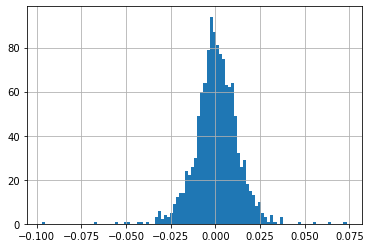

In [16]:
sbux['log_return'].hist(bins=100)

In [17]:
sbux['log_return'].mean(), sbux['log_return'].std(), sbux['log_return'].var()

(0.0005235902748108682, 0.012381234216101258, 0.00015329496071395655)

# Normal Distribution

In [18]:
from scipy.stats import norm

In [19]:
#100 punti di spazio uguale tra minimo e massimo nel valore return
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [20]:
# Creiamo una distribuzione normale con media nella media di return e deviazione standard idem
# x_list fornisce le coordinate x della distribuzione
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale = sbux['return'].std())

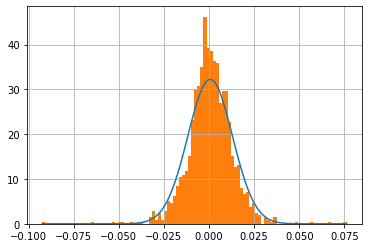

In [21]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)
#density = True: normalizza la distribuzione

In [22]:
# Notiamo che non abbiamo proprio un "good fit"
# Centro abbiamo un picco dei nostri campioni che supera la gobba della campana
# Nelle spalle, abbiamo invece una depressione
# Nelle code, notiamo anche dei valori che dovrebbero essere assenti

In [23]:
from scipy.stats import probplot

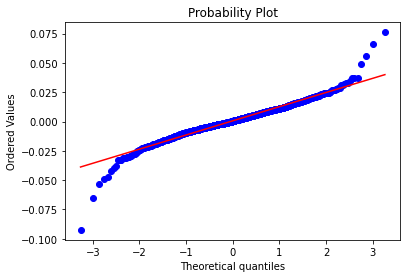

In [24]:
#Con il ; alla fine non stampiamo output array...
#Argomento1: Dati
#Argomento2: Distribuzione Teorica
#Fit=True -> Cerca i migliori parametri per la distribuzione normale per matchare i nostri dati
#plot=plt -> Diciamo la libreria (matplotlib) che usa per il plot.
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

In [25]:
#Altro modo per fare QQ plot:
import statsmodels.api as sm
#Statsmodel è scipy con steroidi ed espansioni
#E' preso da R ed ha un linguaggio statistico

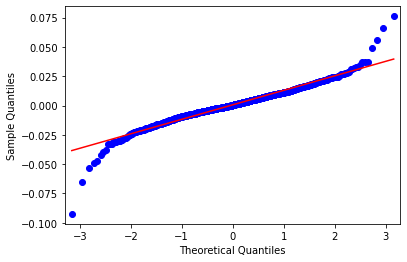

In [26]:
#line='s' significa linea standardizzata: scalata e shiftata 
#sulla distribuzione normale costruita con media e std dai dati.
# mettendo line = 'r' uso una retta di regressione
# LEGGERE LA DOCUMENTAZIONE
sm.qqplot(sbux['return'].dropna(), line='s');

In [27]:
x_list = np.linspace(sbux['log_return'].min(), 
                     sbux['log_return'].max(), 
                     100)


In [28]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale = sbux['log_return'].std())

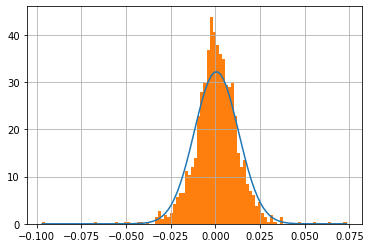

In [29]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

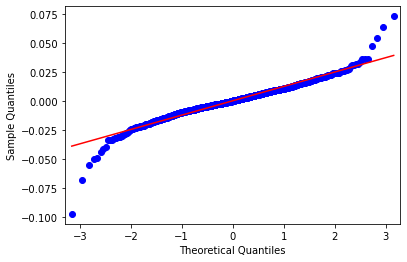

In [30]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

In [31]:
from scipy.stats import t #t è pericoloso, se nominiamo così una var

In [32]:
#Faremo il plot di un istogramma e della PDF di una T distribution con i parametri
#best fit. Dopo di che vedremo il QQ-plot e ripeteremo anche con i log returns
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [33]:
#Parametri della t distribution che bestfitta i dati
params = t.fit(sbux['return'].dropna())
print(params)
#I parametri non sono molto chiari, non li spiega nemmeno la documentazione.
#Sta a noi scoprire a cosa si riferiscono

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)


In [34]:
#Immaginiamo siano i degrees of freedom, location and scale della T-dist
df, loc, scale = params

In [35]:
y_list = t.pdf(x_list, df, loc, scale)

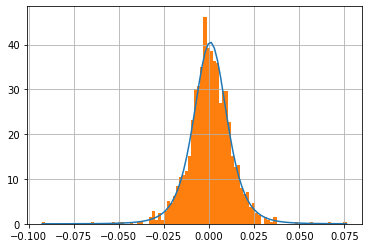

In [36]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density = True)

In [37]:
#sm.qqplot(sbux['return'].dropna(), dist=t, line="s")
'''
Questa chiamata genera errore perchè la funzione qqplot sta tentando di
generare una pff e si aspetta il parametro "df". Bisogna anche stare
attenti perchè df viene spesso usato come "dataframe".
Questo accade perchè tutte le funzioni scipy per la distribuzione T
richiedono un argomento per le degrees of freedom.
Proviamo a vedere cosa succede se usiamo solo scipy per fare il plot.

'''

'\nQuesta chiamata genera errore perchè la funzione qqplot sta tentando di\ngenerare una pff e si aspetta il parametro "df". Bisogna anche stare\nattenti perchè df viene spesso usato come "dataframe".\nQuesto accade perchè tutte le funzioni scipy per la distribuzione T\nrichiedono un argomento per le degrees of freedom.\nProviamo a vedere cosa succede se usiamo solo scipy per fare il plot.\n\n'

In [38]:
#probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt)
'''
Anche questo ci da errore. Diamogli semplicemente l'argomento che si aspetta
'''

"\nAnche questo ci da errore. Diamogli semplicemente l'argomento che si aspetta\n"

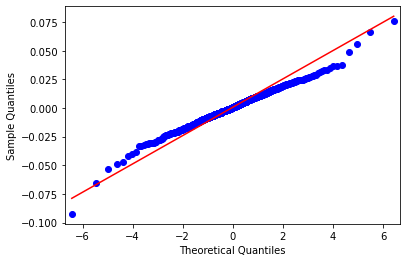

In [39]:
#Creiamo una classe custom che restituisca di base (come ppf) anche il df
class myT:
    def __init__(self, df):
        self.df = df
        self.name = "T Dist"
        
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)
    
sm.qqplot(sbux['return'].dropna(), dist=myT(df), line='s');

In [40]:
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100 )

In [41]:
params = t.fit(sbux['log_return'].dropna())
df, loc, scale = params

In [42]:
y_list = t.pdf(x_list, df, loc, scale)

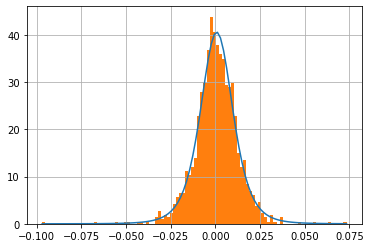

In [43]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

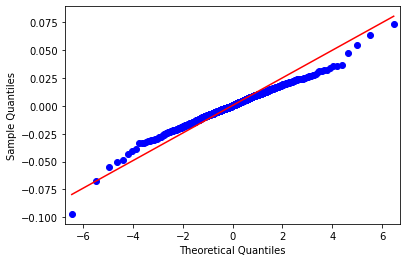

In [44]:
sm.qqplot(sbux['log_return'].dropna(), dist=myT(df), line="s");

### Skewness, Kurtosis

In [45]:
#Skewness:
sbux['return'].skew()

-0.2680784195824153

In [46]:
# (Excess Kurtosis)
sbux['return'].kurtosis()

5.593158903424731

In [47]:
#Ora facciamo una valutazione classica sulla distribuzione normale
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.012446236860803752, -0.053888477623955655)

### Confidence Interval

In [48]:
#Esercizio intervallo confidenza: In una normal dist, abbiamo in genere
# un intervallo di confidenza da -1.96  a +1.96
samp.quantile(0.025), samp.quantile(0.975)


(-1.9940644475922333, 2.0043105009164206)

In [49]:
sbux['return'].dropna().quantile(0.025), sbux['return'].dropna().quantile(0.975)

(-0.023198783075884653, 0.023945008089936402)

In [50]:
values = sbux['return'].dropna().to_numpy()

In [51]:
#ddof = delta degrees of freedom. Il divisore per la std sarà N - ddof.
#con ddof = 0 -> max likelihood
m = values.mean()
s = values.std(ddof=1)

In [52]:
#Calcoliamo con la formula conosciuta il limite minimo e massimo dell'intervallo di confidenza
low = m -1.96*s/np.sqrt(len(values))
high = m +1.96*s/np.sqrt(len(values))
print(low, high)

-8.283965370502102e-05 0.001283306094871204


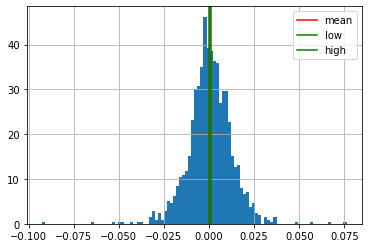

In [53]:
sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label = "mean", color = "red")
plt.axvline(low, label= "low", color = "green")
plt.axvline(high, label= "high", color ="green")
plt.legend()
#Siccome i valori sono molto larghi rispetto ai valori reali, usiamo altro plot

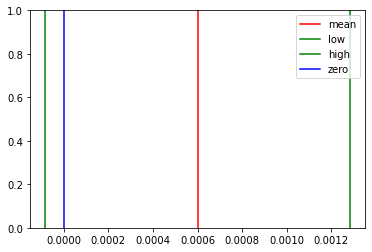

In [54]:
plt.axvline(m, label = "mean", color = "red")
plt.axvline(low, label= "low", color = "green")
plt.axvline(high, label= "high", color ="green")
plt.axvline(0, label="zero", color="blue")
plt.legend()

In [55]:
'''
possiamo notare come il plot sopra (che mostra intervallo confidenza)
contiene sia i valori 0 che valori negativi. Questo significa qualcosa
che vedremo dopo nello statistical testing
''';

In [56]:
from scipy.stats import jarque_bera, normaltest

In [57]:
'''
Jarque Bera Test è un test statistico simile al normal test dove
- H0: ipotesi nulla -> Dati con distribuzione normale
- H1 : ipotesi alternativa -> Dati con distribuzione non normale
Se p-value < 5%, allora rigettiamo H0 (i dati non assomigliano a distr. normale)
'''
jarque_bera(values)


(1639.0284386552219, 0.0)

In [58]:
'''
I risultati di jarque bera e normal test sono:
- Valore del test statistico (molto elevato)
- Valore p value (molto vicino a 0)
 Dunque rigettiamo H0 (come ci attendavamo)
'''
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [59]:
jarque_bera(sbux['log_return'].dropna())

(1882.1814629047672, 0.0)

In [60]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [61]:
'''
Ora proviamo il test di Kormon-Sminuof che è simile al jarque bera
ma con la differenza che H0 è l'appartenenza ad una qualsiasi distribuzione.
'''
from scipy.stats import kstest

In [63]:
df, loc, scale = t.fit(values)

def cdf(x):
    return t.cdf(x, df, loc, scale)

In [64]:
'''
Il test in questione, oltre ai valori, richiede la CDF come argomento
'''
kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7612414101887692)

In [65]:
df, loc, scale = t.fit(sbux['log_return'].dropna())

def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

KstestResult(statistic=0.01837990941957013, pvalue=0.7890580916019734)

In [88]:
#ATTENZIONE, non è LSAMP ma 1SAMP con il numero uno!
'''
Questo è il test che confronta una distribuzione, ad esempio, con un valore.
Stiamo cercando di capire se il nostro return sia effettivamente più o meno
un certo valore. 
In questo caso, stiamo cercando con la media di 0
'''

from scipy.stats import ttest_1samp

In [72]:
'''
Tutti i risultati che stiamo ottenendo sono validi per 2 sides tests.
Per 1 side tests, dovremmo dividere tutto per 2?
'''
ttest_1samp(values, 0)

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [73]:
ttest_1samp(sbux['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=1.4999195047533647, pvalue=0.13388636615667793)

In [74]:
# Proviamo con un altro stock, dato che il precedente p value non era molto significativo:
mmm = data[data['Name'] == 'MMM'].copy()

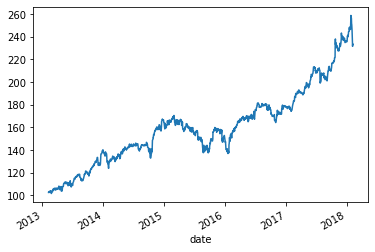

In [75]:
mmm['close'].plot()

In [77]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [79]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

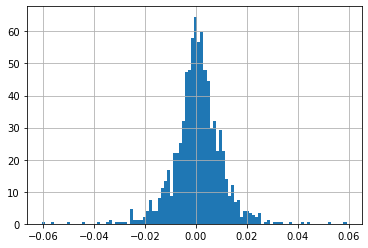

In [80]:
mmm['return'].hist(bins=100, density = True)

In [82]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)

low = m - 1.96 *s / np.sqrt(len(mmm['return']))
high = m + 1.96 *s / np.sqrt(len(mmm['return']))

print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


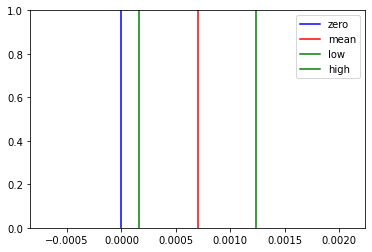

In [85]:
'''
Stiamo implicitamente effettuando uno Z test:
notiamo che la media è al di fuori degli intervalli di confidenza
'''
plt.xlim(low - 0.001, high + 0.001)
plt.axvline(0, label="zero", color='blue')
plt.axvline(m, label="mean", color='red')
plt.axvline(low, label="low", color='green')
plt.axvline(high, label="high", color='green')
plt.legend()

In [89]:
'''
Con questi risultati numerici confermiamo quanto detto sopra:
Stiamo valutando effettivamente, numericamente parlando, che la media di
'return' sia ben lontana da 0 per mmm. Lo notiamo anche dal confidence interv.
plot e dal grafico dello stock che è sempre in salita.
'''
ttest_1samp(mmm['return'].dropna(), 0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [90]:
ttest_1samp(mmm['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)